# Reinforced Learning / Pekiştirmeli - Takviyeli

## 25.1.2-Reinforced Learning / Pekiştirmeli - Takviyeli

## 26.1_Upper Confidence Bound ( UCB ) / Üst Güven Sınırı

## 26.2_Rasgele Yakalaşımın / Random Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 

In [2]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
N = 10000
d = 10
toplam = 0
secilenler = []
for n in range(0,N):
    ad = random.randrange(d)
    secilenler.append(ad)
    odul = data.values[n, ad]
    toplam = toplam + odul

(array([ 981., 1002.,  950., 1026.,  989.,  988., 1062., 1020., 1015.,
         967.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

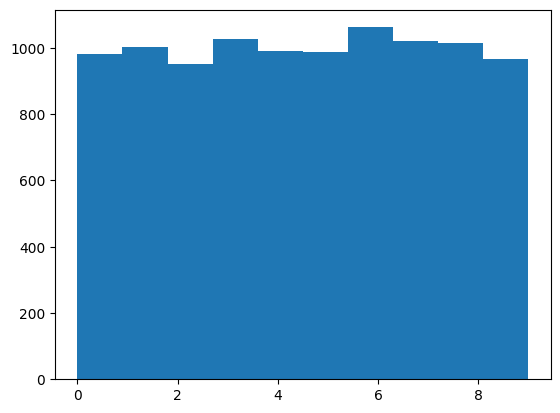

In [4]:
plt.hist(secilenler)

## 26.3_UCB

Toplam Odul:
2211


(array([ 502.,  364.,  278.,  317., 6434.,  147.,  326., 1130.,  331.,
         171.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

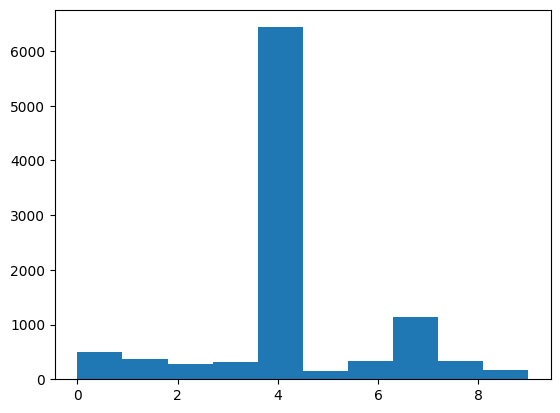

In [ ]:
import math

N = 10000
d = 10

tiklamalar = [0] * d
toplam = 0 
secilenler = []
oduller = [0] * d

for n in range(0,N):
    ad = 0
    max_ucb = 0
    for i in range(0,d):
        if (tiklamalar[i] > 0):
            ortalama = oduller[i] / tiklamalar[i]
            delta = math.sqrt(3/2 * math.log(n) / tiklamalar[i])
            ucb = ortalama + delta
        else:
            ucb = N * 10
        if ucb > max_ucb:
            max_ucb = ucb
            ad = i
    secilenler.append(ad)
    tiklamalar[ad] = tiklamalar[ad] + 1
    odul = data.values[n, ad]
    oduller[ad] = oduller[ad] + odul
    toplam = toplam + odul

print('Toplam Odul:')
print(toplam)

plt.hist(secilenler)

## 26.1_Thompson 

Toplam Odul:
2580


(array([  88.,   66.,   64.,   32., 9183.,   26.,   61.,  403.,   49.,
          28.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

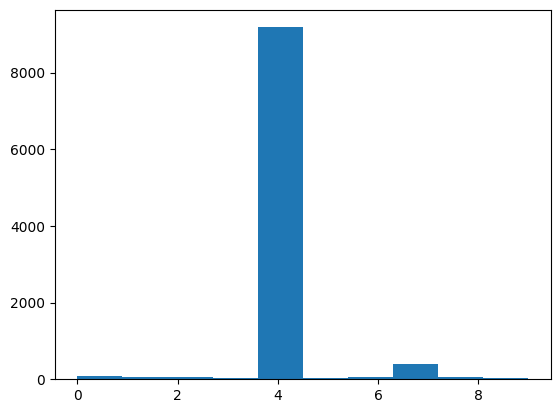

In [ ]:
import random

N = 10000
d = 10

toplam = 0 
secilenler = []
birler = [0] * d
sifirler = [0] * d

for n in range(0,N):
    ad = 0
    max_th = 0
    for i in range(0,d):
        rasbeta = random.betavariate(birler[i] + 1, sifirler[i] + 1)
        if rasbeta > max_th:
            max_th = rasbeta
            ad = i
    secilenler.append(ad)
    odul = data.values[n, ad]
    if odul == 1:
        birler[ad] = birler[ad] + 1
    else:
        sifirler[ad] = sifirler[ad] + 1
    toplam = toplam + odul
    
print('Toplam Odul:')
print(toplam)

plt.hist(secilenler)